In [1]:
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/skokalj/RowanDLclassNEA.git

Cloning into 'RowanDLclassNEA'...
remote: Enumerating objects: 1830, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1830 (delta 0), reused 3 (delta 0), pack-reused 1826
Receiving objects: 100% (1830/1830), 57.56 MiB | 28.02 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (3601/3601), done.


In [4]:
%cd RowanDLclassNEA/

/content/RowanDLclassNEA


In [5]:
!ls

NEUdata  NEUdata_split


In [ ]:
import os
from PIL import Image
from torchvision import transforms
from torchvision.datasets import DatasetFolder
import cv2
import numpy as np


def load_image(img_path:str):


dset = DatasetFolder(root='NEUdata', loader = load_image, extensions = ('.bmp',))


In [ ]:
len(dset)

1800

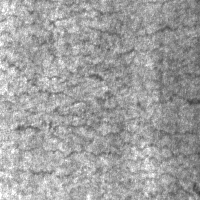

In [ ]:
dset[0][0]

In [ ]:
data, label = dset[0]
print(type(data))

<class 'PIL.Image.Image'>


In [ ]:
print(data)

<PIL.Image.Image image mode=RGB size=200x200 at 0x7948A112EE90>


#### I need to write transfrom to make it compatible with AlexNet

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

dset = DatasetFolder(root='NEUdata', loader = load_image, extensions = ('.bmp',), transform = transform)

In [ ]:
from torch.utils.data import random_split

train_set, val_set = random_split(
                      dset,
                      [1200, 600])

trainloader = torch.utils.data.DataLoader(
                    train_set,
                    batch_size=16,
                    shuffle=True)

valloader = torch.utils.data.DataLoader(
                    val_set,
                    batch_size=16,
                    shuffle=True)

print(len(trainloader))
# out: 2500
print(len(valloader))
# out: 625

75
38


In [ ]:
dd,ll = next(iter(trainloader))

In [ ]:
dd.shape

torch.Size([16, 3, 224, 224])

In [ ]:
print(dd)

tensor([[[[-0.5938, -0.5938, -0.5938,  ..., -0.3369, -0.3369, -0.3369],
          [-0.5767, -0.5767, -0.5253,  ..., -0.3369, -0.3369, -0.3369],
          [-0.5596, -0.5767, -0.5253,  ..., -0.3198, -0.3198, -0.3027],
          ...,
          [-0.3198, -0.3198, -0.2684,  ..., -0.1657, -0.1999, -0.2171],
          [-0.2856, -0.2856, -0.2513,  ..., -0.1999, -0.1657, -0.1999],
          [-0.3027, -0.2856, -0.2856,  ..., -0.1657, -0.1486, -0.1828]],

         [[-0.4776, -0.4776, -0.4776,  ..., -0.2150, -0.2150, -0.2150],
          [-0.4601, -0.4601, -0.4076,  ..., -0.2150, -0.2150, -0.2150],
          [-0.4426, -0.4601, -0.4076,  ..., -0.1975, -0.1975, -0.1800],
          ...,
          [-0.1975, -0.1975, -0.1450,  ..., -0.0399, -0.0749, -0.0924],
          [-0.1625, -0.1625, -0.1275,  ..., -0.0749, -0.0399, -0.0749],
          [-0.1800, -0.1625, -0.1625,  ..., -0.0399, -0.0224, -0.0574]],

         [[-0.2532, -0.2532, -0.2532,  ...,  0.0082,  0.0082,  0.0082],
          [-0.2358, -0.2358, -